In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stripROtools
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.optimize import curve_fit
from scipy.stats import crystalball
from stripROtools import colors




In [2]:
# Load exp data
df_exp = pd.read_pickle("./data/resolution_exp.pk")

# Load sim data
df_sim = pd.read_pickle("./data/resolution_sim.pk")


df_sim.head()

,Name,x_res,x_res_err,y_res,y_res_err,abs_z
0,UH_DLC_a,"[38.16907789152161, 34.35866102947176, 36.6614...","[0.596621645797058, 0.6226449953320682, 0.7022...","[40.03207045457232, 38.97780874418523, 41.8049...","[0.5890397191653336, 0.7442200766452106, 0.920...","[0.1, 0.3, 0.5, 0.7, 0.9, 1.1]"
1,UH_NoDLC_a,"[44.92006751046693, 40.629844330262685, 41.239...","[0.6181425149706512, 0.6056898502327592, 0.632...","[45.72106170084714, 43.8433801744892, 44.57186...","[0.653874914711745, 0.6728088058685272, 0.7130...","[0.1, 0.3, 0.5, 0.7, 0.9, 1.1]"
2,UoS,"[32.43984400412825, 36.143156445889176, 36.051...","[0.716486134909024, 0.8753530885048227, 0.9743...","[39.23799765685965, 37.96034718180943, 36.5710...","[0.8910149691024238, 1.17475272162833, 1.11738...","[0.1, 0.3, 0.5, 0.7, 0.9, 1.1]"


In [3]:
# fit function used to determine contributions to effective point resolution that are not included in simulation
def fit(x, a):
	return np.sqrt(x**2 + a**2)

# UH DLC Quadrant a

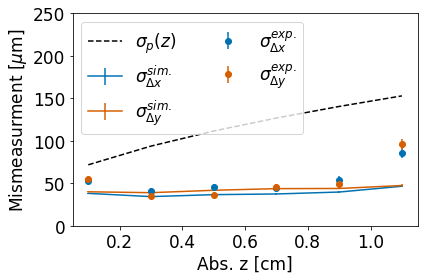

In [4]:
# index specifying detector
index = 0

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].x_res)
x_res_err = np.array(df_exp.iloc[index].x_res_err)
y_res = np.array(df_exp.iloc[index].y_res)
y_res_err = np.array(df_exp.iloc[index].y_res_err)
x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)

DTrans = 0.0135


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.plot(abs_z, np.sqrt( ( 200/np.sqrt(12) )**2 +(np.sqrt(abs_z)*DTrans*10000)**2), "--",color=colors["black"],label="$\sigma_p(z)$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,250))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [$\mu$m]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UH_DLC_PR.pdf")


In [5]:
# Fit simulation data + additional resolution term to experimental data on the x strips

x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  31.515441289621403 +/- 2.111952856109742
The additional point res. contribution on the y strips is:  15.04137881526786 +/- 3.491189378126865


In [6]:
# Repeat fit but omit the last point


x_vals = x_res_sim[:-1]
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)[:-1]
y_vals = x_res[:-1]

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim[:-1]
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)[:-1]
y_vals = y_res[:-1]

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  29.446561568333202 +/- 2.2412037561497367
The additional point res. contribution on the y strips is:  10.349065670881384 +/- 4.977825610573194


# UH NoDLC Quadrant a

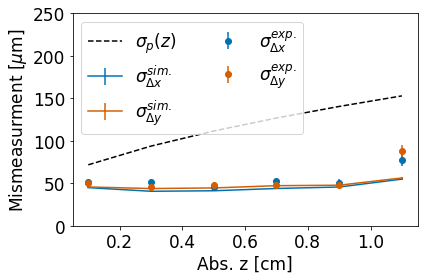

In [7]:
# index specifying detector
index = 1

abs_z = np.array(df_exp.iloc[index].abs_z)
x_res = np.array(df_exp.iloc[index].x_res)
x_res_err = np.array(df_exp.iloc[index].x_res_err)
y_res = np.array(df_exp.iloc[index].y_res)
y_res_err = np.array(df_exp.iloc[index].y_res_err)
x_res_sim = np.array(df_sim.iloc[index].x_res)
x_res_err_sim = np.array(df_sim.iloc[index].x_res_err)
y_res_sim = np.array(df_sim.iloc[index].y_res)
y_res_err_sim = np.array(df_sim.iloc[index].y_res_err)


plt.figure()
plt.errorbar(abs_z,x_res_sim,x_res_err_sim,color=colors["blue"],label="$\sigma_{\Delta x}^{sim.}$")
plt.errorbar(abs_z,y_res_sim,y_res_err_sim,color=colors["red"],label="$\sigma_{\Delta y}^{sim.}$")
plt.errorbar(abs_z,x_res,x_res_err, color=colors["blue"],fmt='o',label="$\sigma_{\Delta x}^{exp.}$")
plt.errorbar(abs_z,y_res,y_res_err, color=colors["red"],fmt='o',label="$\sigma_{\Delta y}^{exp.}$")
plt.plot(abs_z, np.sqrt( ( 200/np.sqrt(12) )**2 +(np.sqrt(abs_z)*DTrans*10000)**2), "--",color=colors["black"],label="$\sigma_p(z)$")
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.legend(ncol=2,fontsize=17)
plt.ylim((0,250))
plt.xlabel("Abs. z [cm]",fontsize=17)
plt.ylabel("Mismeasurment [$\mu$m]",fontsize=17)
plt.tight_layout()
plt.savefig("./figures/UH_NoDLC_PR.pdf")


In [8]:
# Fit simulation data + additional resolution term to experimental data on the x strips

x_vals = x_res_sim
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)
y_vals = x_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)
y_vals = y_res

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  26.711492287671273 +/- 2.520447859529788
The additional point res. contribution on the y strips is:  17.10193120638078 +/- 3.8405577899733565


In [21]:
# Repeat fit but omit the last point


x_vals = x_res_sim[:-1]
sigmas = np.sqrt(x_res_err**2 + x_res_err_sim**2)[:-1]
y_vals = x_res[:-1]

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the x strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])


x_vals = y_res_sim[:-1]
sigmas = np.sqrt(y_res_err**2 + y_res_err_sim**2)[:-1]
y_vals = y_res[:-1]

coeff, covar = curve_fit(fit, x_vals, y_vals, sigma=sigmas, absolute_sigma=True)


print("The additional point res. contribution on the y strips is: ", coeff[0], "+/-", np.sqrt(np.diag(covar))[0])




The additional point res. contribution on the x strips is:  25.62992584203837 +/- 2.63481686277702
The additional point res. contribution on the y strips is:  14.347787615075983 +/- 4.54895239281945
